## Programa paso a paso

In [49]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv',index_col='Id')
df_test =  pd.read_csv('test.csv',index_col='Id')

In [3]:
df_train.columns

Index(['index', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [4]:
#Columnas a eliminar, dado los factores en el README.md
no_relevancia = ['index','month', 'day', 'month', 'NO2', 'O3', 'DEWP', 'station']
df_train.drop(columns= no_relevancia, inplace= True)
df_test.drop(columns= no_relevancia, inplace= True)

In [5]:
df_train.head()

,year,hour,PM2.5,PM10,SO2,CO,TEMP,PRES,RAIN,wd,WSPM
Id,,,,,,,,,,,
1,2013,1,8.0,8.0,4.0,300.0,-1.1,1023.2,0.0,N,4.7
3,2013,3,6.0,6.0,11.0,300.0,-1.4,1024.5,0.0,NW,3.1
4,2013,4,3.0,3.0,12.0,300.0,-2.0,1025.2,0.0,N,2.0
5,2013,5,5.0,5.0,18.0,400.0,-2.2,1025.6,0.0,N,3.7
6,2013,6,3.0,3.0,18.0,500.0,-2.6,1026.5,0.0,NNE,2.5


De primera mano podemos observar que podría ser necesario estandarizar los datos en las siguientes columnas:
* year: Categorizar los valores y evitar los miles
* hour: Siempre y cuando no esté en formato militar
* TEMP: Evitar valores negativos (?)
* wd: Categorizarlo como dummies

In [16]:
df_train.isna().sum()

year     0
hour     0
PM2.5    0
PM10     0
SO2      0
CO       0
TEMP     0
PRES     0
RAIN     0
WSPM     0
N        0
S        0
E        0
W        0
dtype: int64

In [6]:
df_train.dtypes

year       int64
hour       int64
PM2.5    float64
PM10     float64
SO2      float64
CO       float64
TEMP     float64
PRES     float64
RAIN     float64
wd        object
WSPM     float64
dtype: object

In [7]:
df_train["year"].value_counts()

2015    79550
2016    79044
2014    76930
2013    57386
2017    12768
Name: year, dtype: int64

In [8]:
print(f"TEMP\nmin: {df_train['TEMP'].min()}\nmax: {df_train['TEMP'].max()}")

TEMP
min: -19.7
max: 41.6


In [9]:
df_train["wd"].value_counts()

NE     31472
ENE    25014
NW     24061
N      22333
E      21846
SW     21004
NNE    20397
NNW    18520
WNW    17840
ESE    17687
SSW    16513
SE     14735
WSW    14617
S      14084
SSE    12829
W      12726
Name: wd, dtype: int64

La dirección tiene mas valores de los que esperaba, creo deberia sintetizarlo en valores binarios para N, E, S, W

In [10]:
df_train["TEMP"] =(df_train["TEMP"]-df_train["TEMP"].min())/(df_train["TEMP"].max()-df_train["TEMP"].min())
df_test["TEMP"] =(df_test["TEMP"]-df_test["TEMP"].min())/(df_test["TEMP"].max()-df_test["TEMP"].min())

In [11]:
def Estandarizar_Direccion(df):
    for idx in df.index:
        valor_cargado = df.loc[idx, "wd"]
        df.loc[idx, "N"] = 1 if "N" in valor_cargado else 0
        df.loc[idx, "S"] = 1 if "S" in valor_cargado else 0
        df.loc[idx, "E"] = 1 if "E" in valor_cargado else 0
        df.loc[idx, "W"] = 1 if "W" in valor_cargado else 0
    df.drop(columns=["wd"])

In [12]:
Estandarizar_Direccion(df_train)
Estandarizar_Direccion(df_test)

In [14]:
df_train.drop(columns= ["wd"], inplace= True)
df_test.drop(columns= ["wd"], inplace= True)

In [15]:
df_train["year"] = df_train["year"]-2013
df_test["year"] = df_test["year"]-2013

In [17]:
df_train.head()

,year,hour,PM2.5,PM10,SO2,CO,TEMP,PRES,RAIN,WSPM,N,S,E,W
Id,,,,,,,,,,,,,,
1,0,1,8.0,8.0,4.0,300.0,0.303426,1023.2,0.0,4.7,1.0,0.0,0.0,0.0
3,0,3,6.0,6.0,11.0,300.0,0.298532,1024.5,0.0,3.1,1.0,0.0,0.0,1.0
4,0,4,3.0,3.0,12.0,300.0,0.288744,1025.2,0.0,2.0,1.0,0.0,0.0,0.0
5,0,5,5.0,5.0,18.0,400.0,0.285481,1025.6,0.0,3.7,1.0,0.0,0.0,0.0
6,0,6,3.0,3.0,18.0,500.0,0.278956,1026.5,0.0,2.5,1.0,0.0,1.0,0.0


In [30]:
df_test["PM2.5"] = 0
df_test.head()

,year,hour,PM10,SO2,CO,TEMP,PRES,RAIN,WSPM,N,S,E,W,PM2.5
Id,,,,,,,,,,,,,,
0,0,0,4.0,4.0,300.0,0.313214,1023.0,0.0,4.4,1.0,0.0,0.0,1.0,0
2,0,2,7.0,5.0,300.0,0.306688,1023.5,0.0,5.6,1.0,0.0,0.0,1.0,0
12,0,12,6.0,7.0,300.0,0.388254,1027.3,0.0,5.1,1.0,0.0,0.0,1.0,0
15,0,15,15.0,7.0,400.0,0.425775,1025.7,0.0,2.8,1.0,0.0,1.0,0.0,0
17,0,17,23.0,11.0,400.0,0.394780,1026.3,0.0,2.8,1.0,0.0,1.0,0.0,0


In [60]:
X = df_train.drop(columns=["PM2.5"])
y = df_train["PM2.5"]
X_train,x_test,y_train, y_test = train_test_split(X,y)

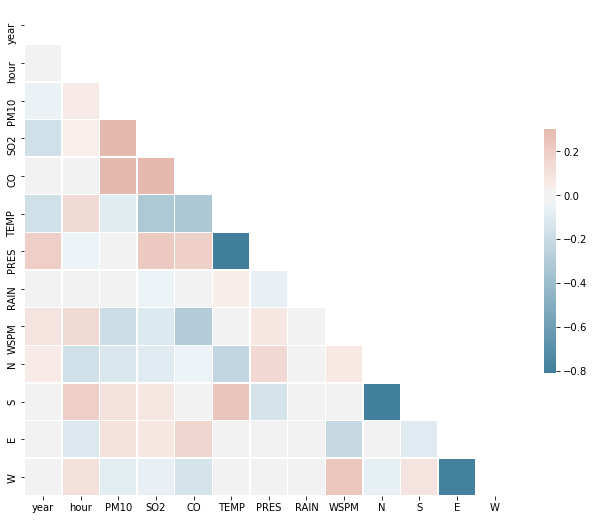

In [78]:
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Claro...
1. Puedo dejar la dirección definida por solo N y E, la auscencia de ellas simbolizaria lo contrario
2. Podría probar a remover la presión atmosferica y mantener la temperatura

Lo hare mas abajo para mantener los datos y ver diferencias

In [61]:
def modeling_testing(lista_modelos):
    for i in lista_modelos:
        modelo = i()
        modelo.fit(X_train,y_train)
        train_score = modelo.score(X_train,y_train)
        test_score = modelo.score(x_test, y_test)
        print('Modelo :', str(i).split(sep = '.')[-1])
        print('Train_score :', train_score,'\nTest_Score:' ,test_score,'\n')

![decisión](https://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet-2.png)

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor

lista_m= [
    RandomForestRegressor,          
    GradientBoostingRegressor,
    KNeighborsRegressor,
    LinearRegression,
    Ridge,
    MLPRegressor
         ]

In [69]:
modeling_testing(lista_m)

Modelo : RandomForestRegressor'>
Train_score : 0.9902784167626913 
Test_Score: 0.9340531626707985 

Modelo : GradientBoostingRegressor'>
Train_score : 0.9061643343551061 
Test_Score: 0.9079549029924755 

Modelo : KNeighborsRegressor'>
Train_score : 0.9317770919229104 
Test_Score: 0.8996389758308745 

Modelo : LinearRegression'>
Train_score : 0.8434875329696636 
Test_Score: 0.8477555079401506 

Modelo : Ridge'>
Train_score : 0.8434875327802022 
Test_Score: 0.8477556321537686 

Modelo : MLPRegressor'>
Train_score : 0.9071584270801607 
Test_Score: 0.9106167540300654 



Con valores por default el 'RandomForestRegressor' es el modelo con mayor precisión.

In [71]:
rfr_0 = RandomForestRegressor(
    n_estimators= 100,
    criterion= "mse",
    min_samples_split= 2,
    min_samples_leaf= 1
)

rfr_1 = RandomForestRegressor(
    n_estimators= 200,
    criterion= "mse",
    min_samples_split= 4,
    min_samples_leaf= 2
)

rfr_2 = RandomForestRegressor(
    n_estimators= 300,
    criterion= "mse",
    min_samples_split= 6,
    min_samples_leaf= 3
)

In [75]:
configuraciones = [rfr_0, rfr_1, rfr_2]
for configuracion in configuraciones:
    configuracion.fit(X_train,y_train)
    train_score = configuracion.score(X_train,y_train)
    test_score = configuracion.score(x_test, y_test)
    print('Train_score :', train_score,'\nTest_Score:' ,test_score,'\n')

Train_score : 0.9902151189250815 
Test_Score: 0.9342373291034921 

Train_score : 0.9840550475985212 
Test_Score: 0.9339587824065907 

Train_score : 0.9771002121902357 
Test_Score: 0.9334219223737326 



In [77]:
rfr_3 = RandomForestRegressor(
    n_estimators= 50,
    criterion= "mse",
    min_samples_split= 2,
    min_samples_leaf= 1
)
rfr_3.fit(X_train,y_train)
train_score = rfr_3.score(X_train,y_train)
test_score = rfr_3.score(x_test, y_test)
print('Train_score :', train_score,'\nTest_Score:' ,test_score,'\n')

Train_score : 0.9898034192042398 
Test_Score: 0.9333432540374889 



In [79]:
X = df_train.drop(columns=["PM2.5","S","W", "PRES"])
X_train,x_test,y_train, y_test = train_test_split(X,y)
rfr_0.fit(X_train,y_train)
train_score = rfr_0.score(X_train,y_train)
test_score = rfr_0.score(x_test, y_test)
print('Train_score :', train_score,'\nTest_Score:' ,test_score,'\n')

Train_score : 0.9898208770609135 
Test_Score: 0.9244019089081252 



In [80]:
X = df_train.drop(columns=["PM2.5","S","W"])
X_train,x_test,y_train, y_test = train_test_split(X,y)
rfr_0.fit(X_train,y_train)
train_score = rfr_0.score(X_train,y_train)
test_score = rfr_0.score(x_test, y_test)
print('Train_score :', train_score,'\nTest_Score:' ,test_score,'\n')

Train_score : 0.9903314356573149 
Test_Score: 0.9313785140220596 

